<a id="100"></a>
**HOME**

**Main Idea:**

Volatility measures the degree of variation or fluctuation in an asset's price over a given period. Volatility trading doesn't focus on whether an asset’s price will rise or fall but rather on how much it will move. The objective of this volatility research is to identify the threshold. The main points are as follows:

> * **Volatility from High and Low: (High-Low)/Low**
> * **Monthly, Dately, Daily, Hourly**
> * **Choose the lowest volatility on each timeframe**

**References:**

- [A comparison of bitcoin futures return and return volatility](https://www.sciencedirect.com/science/article/abs/pii/S1062940824000846)
- [Forecasting cryptocurrency returns with machine learning](https://www.sciencedirect.com/science/article/abs/pii/S0275531923000314)
- [Bitcoin versus S&P 500 Index: Return and Risk Analysis](https://www.mdpi.com/2297-8747/29/3/44)
- [The asymmetric relationships between the Bitcoin futures’ return, volatility, and trading volume](https://www.sciencedirect.com/science/article/abs/pii/S1059056023002216)
- [Which factors drive Bitcoin volatility: Macroeconomic, technical, or both?](https://onlinelibrary.wiley.com/doi/abs/10.1002/for.2930)
- [Return-volatility relationships in cryptocurrency markets approach](https://www.sciencedirect.com/science/article/pii/S1057521923004106)

### Table of Contents
* [1-Dataset](#1)
* [2-Monthly Volatility](#2)
* [3-Date Volatility: ALL DATA](#3)
* [4-Daily Volatility](#4)
* [5-Hourly Volatility](#5)
* [6-Threshold](#6)

____

<a id="1"></a>
**1-Dataset:**

In [1]:
symbol = 'BTCUSDT'        # Symbol to fetch (without '/')

In [2]:
from binance.client import Client  # we have to replace by requests
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L" # LOAD FROM CSV
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df_daily = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'], unit='ms')
    return df_daily

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1DAY  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_daily = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_daily)}")
    print(df_daily.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 715 data points. Total so far: 2715
Reached the end of available data.
Total fetched data points: 2715
   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


In [3]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1HOUR  # Changed to hourly ('1h')
    start_time = int(pd.Timestamp("2020-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_hourly = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_hourly)}")
    print(df_hourly.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 1000 data points. Total so far: 3000
Fetched 1000 data points. Total so far: 4000
Fetched 1000 data points. Total so far: 5000
Fetched 1000 data points. Total so far: 6000
Fetched 1000 data points. Total so far: 7000
Fetched 1000 data points. Total so far: 8000
Fetched 1000 data points. Total so far: 9000
Fetched 1000 data points. Total so far: 10000
Fetched 1000 data points. Total so far: 11000
Fetched 1000 data points. Total so far: 12000
Fetched 1000 data points. Total so far: 13000
Fetched 1000 data points. Total so far: 14000
Fetched 1000 data points. Total so far: 15000
Fetched 1000 data points. Total so far: 16000
Fetched 1000 data points. Total so far: 17000
Fetched 1000 data points. Total so far: 18000
Fetched 1000 data points. Total so far: 19000
Fetched 1000 data points. Total so far: 20000
Fetched 1000 data points. Total so far: 21000
Fetched 1000 data points. Total so far: 220

<a name="id"></a>
[**Back to HOME**](#100)

<a id="2"></a>
**1-Monthly Volatility:**

In [4]:
from datetime import timedelta
import pandas as pd

def calculate_volatility_for_month(df_daily, years):
    """
    Calculate average volatility for a specific number of years
    
    Parameters:
    df_daily (pd.DataFrame): DataFrame with daily price data
    years (int): Number of years to look back
    
    Returns:
    float: Average volatility for the period
    """
    # Calculate the start date for the period
    period_start = df_daily['timestamp'].max() - timedelta(days=365 * years)
    
    # Filter data for the period and create a copy to avoid warnings
    df_period = df_daily[df_daily['timestamp'] >= period_start].copy()
    
    # Calculate volatility using loc
    df_period.loc[:, 'volatility'] = (df_period['high'] - df_period['low']) / df_period['low'] * 100
    
    # Add month name column using loc
    df_period.loc[:, 'month_name'] = df_period['timestamp'].dt.month_name()
    
    # Calculate monthly averages
    monthly_volatility = df_period.groupby('month_name')['volatility'].mean()
    
    # Calculate overall average
    avg_volatility = monthly_volatility.mean()
    
    return avg_volatility

# Calculate volatility for 1-50 years
volatility_results = {}
for years in range(1, 51):  # Changed range to start from 1
    volatility = calculate_volatility_for_month(df_daily, years)
    volatility_results[f'{years} Years'] = round(volatility, 2)

# Create a summary DataFrame
summary_df_monthly = pd.DataFrame.from_dict(volatility_results, orient='index', columns=['Monthly Average Volatility (%)'])
summary_df_monthly.index.name = 'Time Period'
summary_df_monthly

,Monthly Average Volatility (%)
Time Period,
1 Years,4.24
2 Years,3.87
3 Years,4.20
4 Years,4.86
5 Years,5.04
6 Years,5.05
7 Years,5.21
8 Years,5.57
9 Years,5.57


In [5]:
# Finding the year with the smallest average monthly volatility
lowest_monthly_vola_year = summary_df_monthly['Monthly Average Volatility (%)'].idxmin()
lowest_monthly_vola_value = summary_df_monthly['Monthly Average Volatility (%)'].min()

# Extracting only the year number
lowest_year = int(lowest_monthly_vola_year.split(' ')[0])

print(f"The year with the smallest average monthly volatility: {lowest_year}")
print(f"The smallest average monthly volatility: {lowest_monthly_vola_value}%")

The year with the smallest average monthly volatility: 2
The smallest average monthly volatility: 3.87%


In [6]:
xdays=lowest_year*365
xdays

730

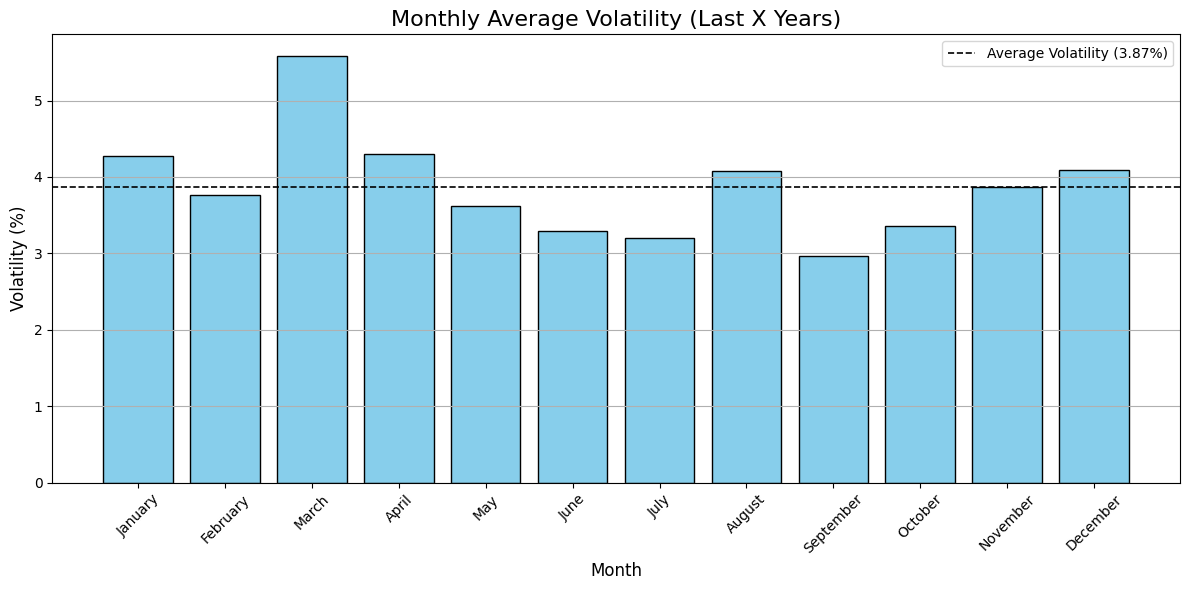

In [7]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 1: Filter data for the last 730 days
months_ago = df_daily['timestamp'].max() - timedelta(days=xdays)
df_last = df_daily[df_daily['timestamp'] >= months_ago].copy()  # Use .copy() to avoid the warning

# Step 2: Calculate Hourly Volatility (High-Low Difference Percentage)
df_last['volatility'] = (df_last['high'] - df_last['low']) / df_last['low'] * 100

# Step 3: Add a 'month_name' column for grouping by month (January, February, etc.)
df_last['month_name'] = df_last['timestamp'].dt.month_name()

# Step 4: Group by 'month_name' and calculate the average volatility
monthly_volatility_last = df_last.groupby('month_name')['volatility'].mean()

# Sort by calendar order (January to December)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_volatility_last = monthly_volatility_last.reindex(month_order)

# Step 5: Plot the monthly volatility
plt.figure(figsize=(12, 6))
plt.bar(monthly_volatility_last.index, monthly_volatility_last, color='skyblue', edgecolor='black')

# Highlight the Average Line
avg_volatility_monthly = monthly_volatility_last.mean()
plt.axhline(y=avg_volatility_monthly, color='black', linestyle='--', linewidth=1.2, label=f'Average Volatility ({avg_volatility_monthly:.2f}%)')

# Add Labels and Title
plt.title('Monthly Average Volatility (Last X Years)', fontsize=16)
plt.ylabel('Volatility (%)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
import math as math
monthly_vola_threshold = math.ceil(avg_volatility_monthly * 100) / 100
monthly_vola_threshold

3.87

<a id="id"></a>
[**Back to HOME**](#100)

<a id="3"></a>
**3-Date Volatility: ALL DATA**

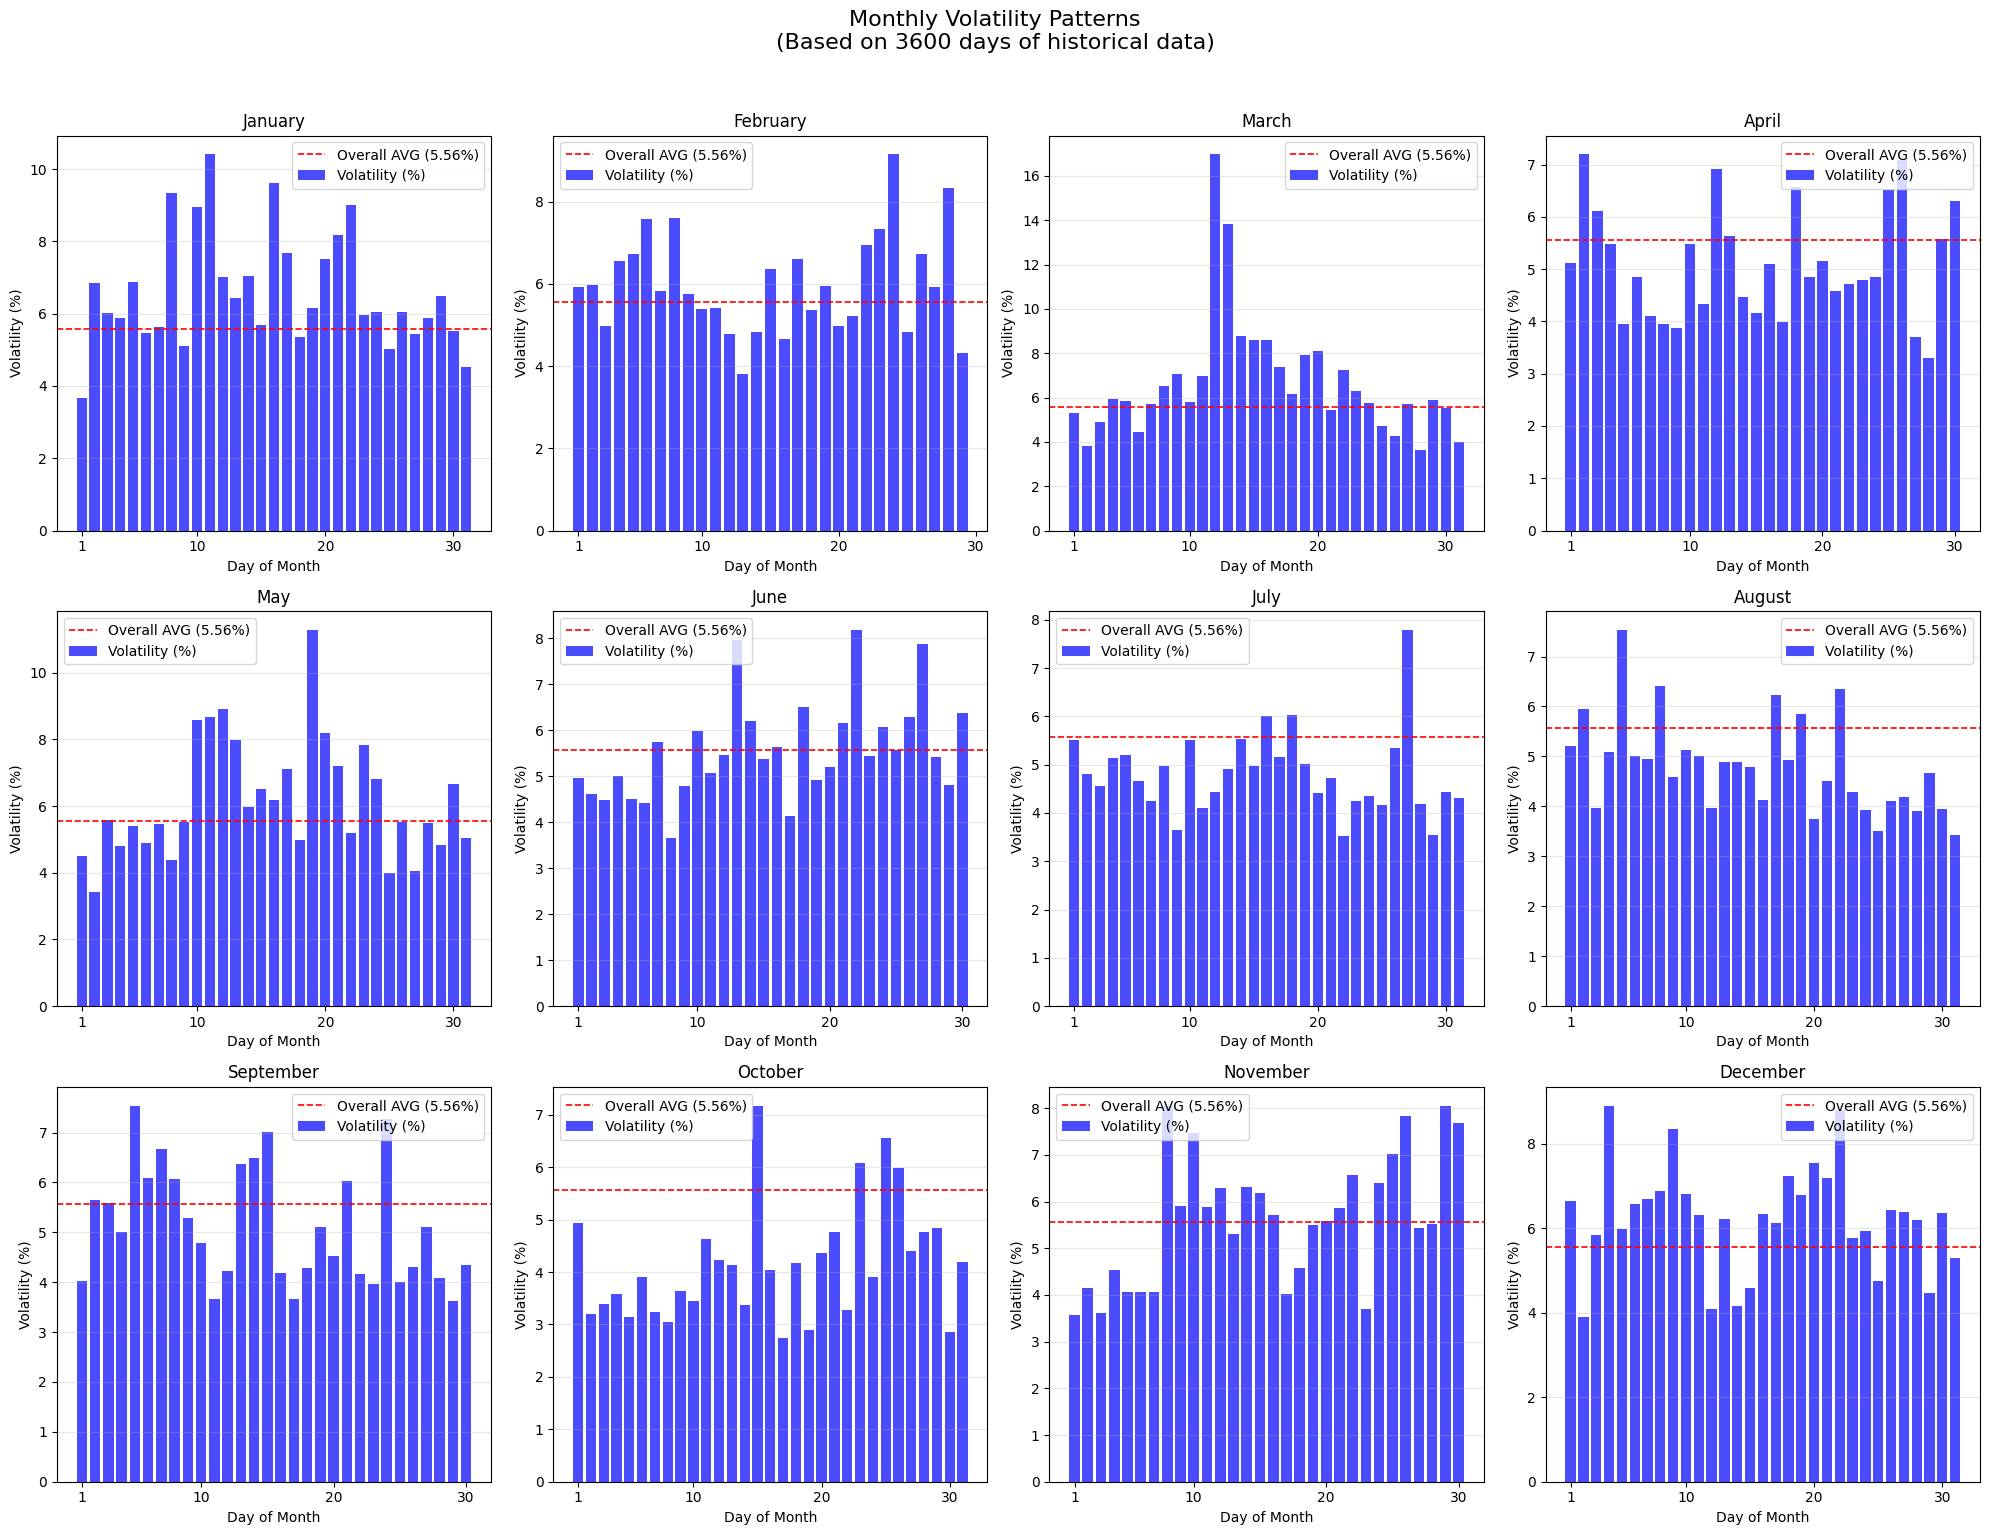


Monthly Volatility Statistics:
           Mean Volatility  Std Dev  Min Volatility  Max Volatility
January               6.63     5.93            0.44           49.89
February              6.03     4.81            0.89           31.30
March                 6.68     7.30            0.82           80.64
April                 5.09     3.06            1.06           18.82
May                   6.16     4.82            1.20           45.28
June                  5.56     4.03            0.60           28.06
July                  4.82     3.09            0.52           17.95
August                4.79     2.86            0.34           20.73
September             5.11     4.43            0.47           36.88
October               4.16     3.11            0.67           22.43
November              5.63     4.54            0.79           32.63
December              6.24     5.65            0.56           43.23


In [9]:
from datetime import timedelta
import matplotlib.pyplot as plt
import calendar

# Step 1: Filter the last 1080 days with a proper copy
thousand_days_ago = df_daily['timestamp'].max() - timedelta(days=36500)
df_last_thousanddays = df_daily[df_daily['timestamp'] >= thousand_days_ago].copy()

# Step 2: Calculate Daily Volatility (High-Low Difference Percentage)
df_last_thousanddays['volatility'] = (df_last_thousanddays['high'] - df_last_thousanddays['low']) / df_last_thousanddays['low'] * 100

# Step 3: Extract month and day separately
df_last_thousanddays['month'] = df_last_thousanddays['timestamp'].dt.month
df_last_thousanddays['day'] = df_last_thousanddays['timestamp'].dt.day
df_last_thousanddays['month_day'] = df_last_thousanddays['timestamp'].dt.strftime('%m-%d')

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

# Calculate overall average for reference line
overall_avg = df_last_thousanddays['volatility'].mean()

# Process each month
for month in range(1, 13):
    # Get data for current month
    month_data = df_last_thousanddays[df_last_thousanddays['month'] == month]
    monthly_volatility = month_data.groupby('day')['volatility'].mean()
    
    # Plot in the corresponding subplot (month-1 because arrays are 0-based)
    ax = axes[month-1]
    
    # Create bar plot
    ax.bar(monthly_volatility.index, monthly_volatility.values, 
           color='blue', alpha=0.7, label='Volatility (%)')
    
    # Add average line
    ax.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1.2,
               label=f'Overall AVG ({overall_avg:.2f}%)')
    
    # Customize subplot
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Volatility (%)')
    ax.grid(axis='y', alpha=0.3)
    ax.legend()
    
    # Set x-axis ticks
    ax.set_xticks([1, 10, 20, 30])

# Adjust layout
plt.suptitle('Monthly Volatility Patterns\n(Based on 3600 days of historical data)', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis: Print monthly statistics
monthly_stats = df_last_thousanddays.groupby('month').agg({
    'volatility': ['mean', 'std', 'min', 'max']
}).round(2)

monthly_stats.columns = ['Mean Volatility', 'Std Dev', 'Min Volatility', 'Max Volatility']
monthly_stats.index = [calendar.month_name[month] for month in range(1, 13)]
print("\nMonthly Volatility Statistics:")
print(monthly_stats)

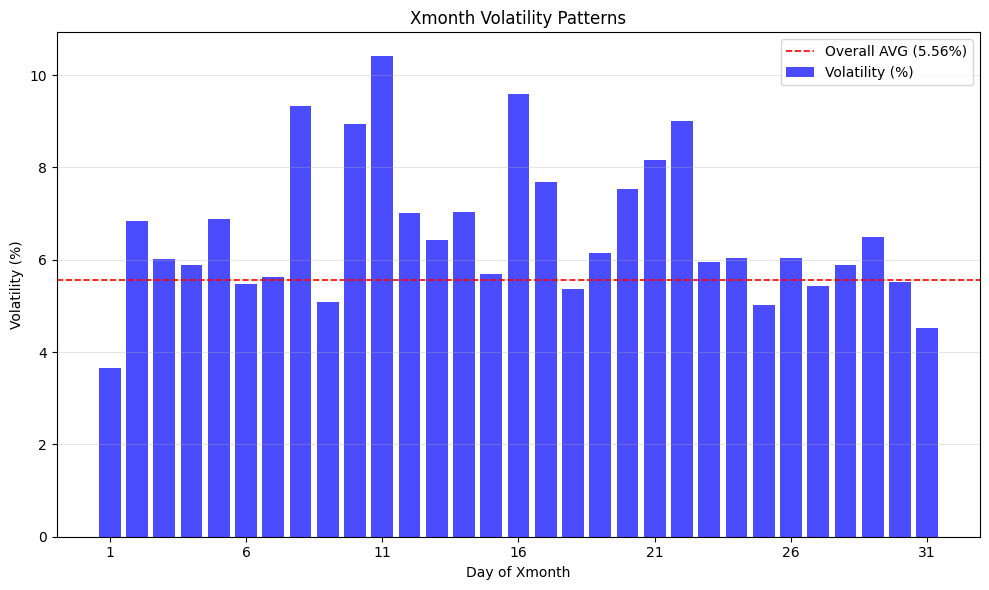


XMonth Volatility Statistics:
mean     6.63
std      5.93
min      0.44
max     49.89
Name: volatility, dtype: float64


In [10]:
# from datetime import timedelta
# import matplotlib.pyplot as plt
# import calendar

# # Step 1: Filter the last 1080 days with a proper copy
# thousand_days_ago = df_daily['timestamp'].max() - timedelta(days=3600)
# df_last_thousanddays = df_daily[df_daily['timestamp'] >= thousand_days_ago].copy()

# # Step 2: Calculate Daily Volatility (High-Low Difference Percentage)
# df_last_thousanddays['volatility'] = (df_last_thousanddays['high'] - df_last_thousanddays['low']) / df_last_thousanddays['low'] * 100

# # Step 3: Extract month and day separately
# df_last_thousanddays['month'] = df_last_thousanddays['timestamp'].dt.month
# df_last_thousanddays['day'] = df_last_thousanddays['timestamp'].dt.day
# df_last_thousanddays['month_day'] = df_last_thousanddays['timestamp'].dt.strftime('%m-%d')

# Step 4: Filter for December (month = 12)
xmonth_data = df_last_thousanddays[df_last_thousanddays['month'] == 1]

# Calculate Daily Volatility for December
xmonth_volatility = xmonth_data.groupby('day')['volatility'].mean()

# Create a bar plot for December
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
ax.bar(xmonth_volatility.index, xmonth_volatility.values, 
       color='blue', alpha=0.7, label='Volatility (%)')

# Add overall average line
overall_avg = df_last_thousanddays['volatility'].mean()
ax.axhline(y=overall_avg, color='red', linestyle='--', linewidth=1.2, 
           label=f'Overall AVG ({overall_avg:.2f}%)')

# Customize plot
ax.set_title('Xmonth Volatility Patterns')
ax.set_xlabel('Day of Xmonth')
ax.set_ylabel('Volatility (%)')
ax.grid(axis='y', alpha=0.3)
ax.legend()

# Set x-axis ticks
ax.set_xticks(range(1, 32, 5))  # Adjust tick spacing as needed

# Show plot
plt.tight_layout()
plt.show()

# Additional analysis: Print December statistics
xmonth_stats = xmonth_data['volatility'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nXMonth Volatility Statistics:")
print(xmonth_stats)

<a name="id"></a>
[**Back to HOME**](#100)

<a id="4"></a>
**4-Daily Volatility:**

In [11]:
from datetime import timedelta

# List of days to analyze
periods = [7, 30, 90, 180, 365, 1095, 1825, 3650]

# Dictionary to store results
avg_volatilities = {}

for days in periods:
    # Filter the last X days
    x_days_ago = df_daily['timestamp'].max() - timedelta(days=days)
    df_last_xdays = df_daily[df_daily['timestamp'] >= x_days_ago].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Calculate Daily Volatility
    df_last_xdays['volatility'] = (df_last_xdays['high'] - df_last_xdays['low']) / df_last_xdays['low'] * 100
    
    # Add day_name column
    df_last_xdays['day_name'] = df_last_xdays['timestamp'].dt.day_name()
    
    # Group by day_name and calculate mean volatility
    daily_volatility = df_last_xdays.groupby('day_name')['volatility'].mean()
    
    # Sort by calendar order
    day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    daily_volatility = daily_volatility.reindex(day_order)
    
    # Calculate average volatility for this period
    avg_daily_volatility = daily_volatility.mean()
    
    # Store result in dictionary
    avg_volatilities[f'avg_volatility_last_{days}days'] = avg_daily_volatility

avg_volatilities

{'avg_volatility_last_7days': 5.225673054548175,
 'avg_volatility_last_30days': 3.9774431121452847,
 'avg_volatility_last_90days': 4.2612922880000745,
 'avg_volatility_last_180days': 4.192073368717696,
 'avg_volatility_last_365days': 4.241097797453178,
 'avg_volatility_last_1095days': 4.199639130249595,
 'avg_volatility_last_1825days': 5.04079823685028,
 'avg_volatility_last_3650days': 5.564977743601598}

In [12]:
# Find the period with the minimum average volatility
min_volatility_period = min(avg_volatilities, key=avg_volatilities.get)
min_volatility_value = avg_volatilities[min_volatility_period]
days_for_min_volatility = int(min_volatility_period.split('_')[-1].replace('days', ''))
days_for_min_volatility

30

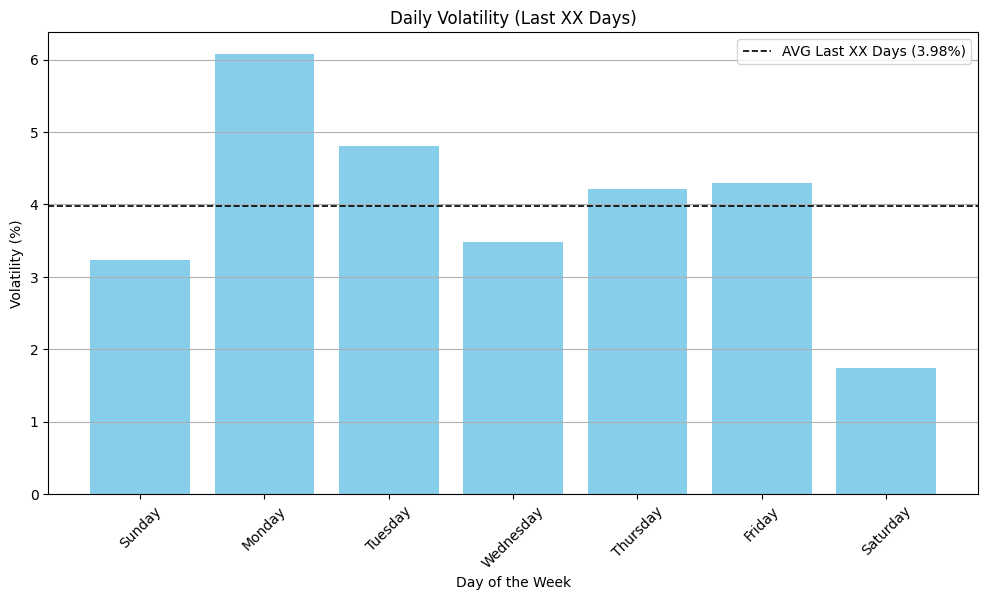

In [13]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 1: Filter the last X days
xxdays_days_ago = df_daily['timestamp'].max() - timedelta(days=days_for_min_volatility)
df_last_xxdays = df_daily[df_daily['timestamp'] >= xxdays_days_ago].copy()  # Use .copy() to ensure a deep copy

# Step 2: Calculate Daily Volatility (High-Low Difference Percentage)
df_last_xxdays.loc[:, 'volatility'] = (df_last_xxdays['high'] - df_last_xxdays['low']) / df_last_xxdays['low'] * 100

# Step 3: Add a 'day_name' column for grouping by day (Monday, Tuesday, etc.)
df_last_xxdays.loc[:, 'day_name'] = df_last_xxdays['timestamp'].dt.day_name()

# Step 4: Group by 'day_name' and calculate the mean of daily volatility
daily_volatility_last_xxdays = df_last_xxdays.groupby('day_name')['volatility'].mean()

# Sort by calendar order (Sunday to Saturday)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_volatility_last_xxdays = daily_volatility_last_xxdays.reindex(day_order)

# Step 5: Plot the daily volatility
plt.figure(figsize=(12, 6))
plt.bar(daily_volatility_last_xxdays.index, daily_volatility_last_xxdays, color='skyblue')

# Highlight the Average Line
daily_avg_volatility_last_xxdays = daily_volatility_last_xxdays.mean()
plt.axhline(y=daily_avg_volatility_last_xxdays, color='black', linestyle='--', linewidth=1.2, label=f'AVG Last XX Days ({daily_avg_volatility_last_xxdays:.2f}%)')

# Add labels and title
plt.title('Daily Volatility (Last XX Days)')
plt.ylabel('Volatility (%)')
plt.xlabel('Day of the Week')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [14]:
import math as math
daily_vola_threshold = math.ceil(daily_avg_volatility_last_xxdays * 100) / 100
daily_vola_threshold

3.98

<a name="id"></a>
[**Back to HOME**](#100)

<a id="5"></a>
**5-Hourly Volatility:**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


def calculate_average_volatility(df_hourly, days):
    # Convert timestamp to datetime if not already
    df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])
    
    # Filter data for the specified days
    last_n_days = datetime.now() - timedelta(days=days)
    df_period = df_hourly[df_hourly['timestamp'] >= last_n_days].copy()  # Explicitly create a copy
    
    # Extract hour from datetime
    df_period['hour'] = df_period['timestamp'].dt.hour
    
    # Calculate Hourly Volatility
    df_period.loc[:, 'volatility'] = (df_period['high'] - df_period['low']) / df_period['low'] * 100
    
    # Group by Hour and Calculate Average Volatility
    hourly_volatility = df_period.groupby('hour')['volatility'].mean()
    
    # Calculate overall average volatility
    average_volatility = hourly_volatility.mean()
    
    return average_volatility

# List of days to analyze
days_list = [7, 30, 90, 180, 365, 1095, 1825,3650, 7300, 10950]


# Calculate and print average volatility for each period
for days in days_list:
    avg_volatility = calculate_average_volatility(df_hourly, days)
    print(f"Average volatility for last {days} days: {avg_volatility:.2f}%")

Average volatility for last 7 days: 1.02%
Average volatility for last 30 days: 0.76%
Average volatility for last 90 days: 0.79%
Average volatility for last 180 days: 0.77%
Average volatility for last 365 days: 0.77%
Average volatility for last 1095 days: 0.76%
Average volatility for last 1825 days: 0.93%
Average volatility for last 3650 days: 0.93%
Average volatility for last 7300 days: 0.93%
Average volatility for last 10950 days: 0.93%


In [16]:
# Dictionary to store volatility for each period
volatility_dict = {}

# Calculate average volatility for each period and store in dictionary
for days in days_list:
    avg_volatility = calculate_average_volatility(df_hourly, days)
    volatility_dict[days] = avg_volatility

# Find the day with the smallest average volatility
smallest_volatility_day = min(volatility_dict, key=volatility_dict.get)
smallest_volatility = volatility_dict[smallest_volatility_day]

# Show only the day with the smallest volatility
print(f"Day with smallest average volatility: {smallest_volatility_day} days ({smallest_volatility:.2f}%)")
smallest_volatility_day = min(volatility_dict, key=volatility_dict.get)

Day with smallest average volatility: 30 days (0.76%)


In [17]:
# Find the day with the smallest average volatility
smallest_volatility_day = min(volatility_dict, key=volatility_dict.get)
smallest_volatility_day 

30

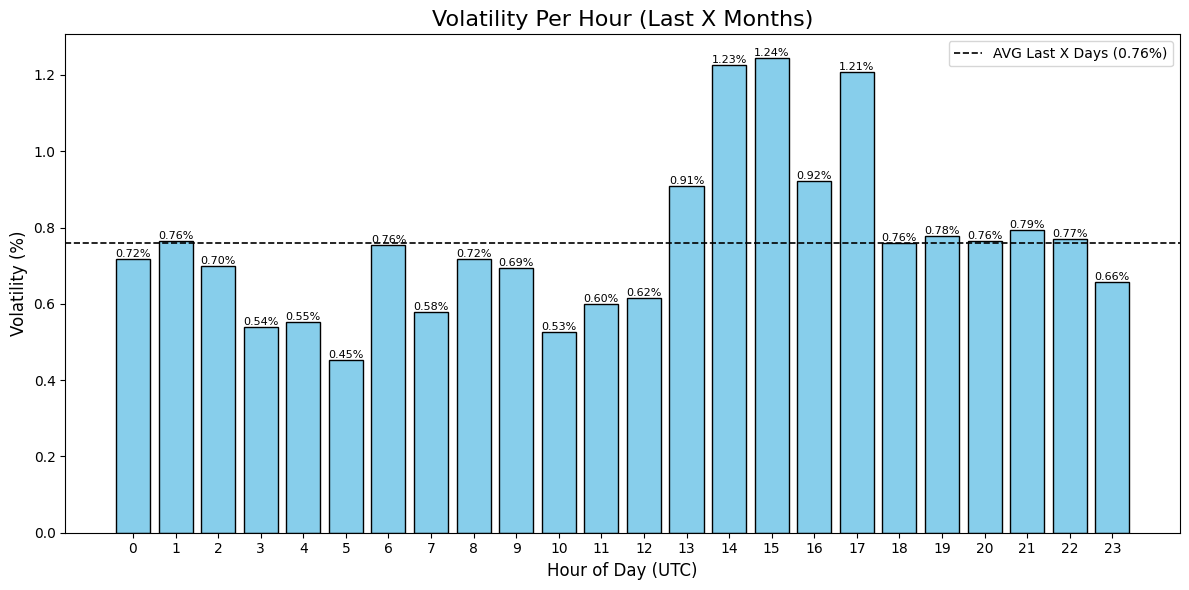

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Convert datetime to a pandas datetime object
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])

# Filter data for the last 3 months (X days)
last_x_months = datetime.now() - timedelta(days=smallest_volatility_day )
df_last_x_months = df_hourly[df_hourly['timestamp'] >= last_x_months].copy()  # Use .copy() to avoid warnings

# Extract hour from datetime
df_last_x_months.loc[:, 'hour'] = df_last_x_months['timestamp'].dt.hour

# Calculate Hourly Volatility (High-Low Difference Percentage)
df_last_x_months.loc[:, 'volatility'] = (df_last_x_months['high'] - df_last_x_months['low']) / df_last_x_months['low'] * 100

# Group by Hour and Calculate Average Volatility
hourly_volatility = df_last_x_months.groupby('hour')['volatility'].mean()

# Prepare the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_volatility.index, hourly_volatility, color='skyblue', edgecolor='black')

# Highlight the Average Line
average_hr_volatility_last_xdays = hourly_volatility.mean()
plt.axhline(y=average_hr_volatility_last_xdays, color='black', linestyle='--', linewidth=1.2, label=f'AVG Last X Days ({average_hr_volatility_last_xdays:.2f}%)')

# Annotate Bars with Values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

# Add Chart Labels and Title
plt.title('Volatility Per Hour (Last X Months)', fontsize=16)
plt.xlabel('Hour of Day (UTC)', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend()

# Show the Plot
plt.tight_layout()
plt.show()

In [19]:
average_hr_volatility_last_xdays

0.759961328013604

In [20]:
import math as math
hourly_vola_threshold = math.ceil(average_hr_volatility_last_xdays * 100) / 100
hourly_vola_threshold

0.76

In [21]:
hourly_volatility

hour
0     0.717324
1     0.763524
2     0.698148
3     0.538278
4     0.552199
5     0.452546
6     0.755434
7     0.579797
8     0.716989
9     0.692878
10    0.525629
11    0.599042
12    0.615124
13    0.909279
14    1.226397
15    1.244353
16    0.922993
17    1.208103
18    0.758700
19    0.776939
20    0.764619
21    0.792494
22    0.769951
23    0.658332
Name: volatility, dtype: float64

In [22]:
std_hourly_volatility=hourly_volatility.std()

In [23]:
import math as math
std_hourly_volatility = math.ceil(std_hourly_volatility * 100) / 100
std_hourly_volatility

0.22

In [24]:
hourly_vola_final=hourly_vola_threshold-std_hourly_volatility
hourly_vola_final=round(hourly_vola_final,2)
hourly_vola_final

0.54

<a name="id"></a>
[**Back to HOME**](#100)

<a id="6"></a>
**6-Threshold:**

In [25]:
print(monthly_vola_threshold)

3.87


In [26]:
print(daily_vola_threshold)

3.98


In [27]:
print(hourly_vola_threshold)

0.76


In [28]:
print(hourly_vola_final)

0.54


<a name="id"></a>
[**Back to HOME**](#100)